# Code for multi-class fusion model-1 (ANN+SVM) using weighted score fusion

In [ ]:
from keras.models import Sequential
from keras.layers import Dense ,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import SGD

from matplotlib import pyplot as plt
import numpy
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = numpy.loadtxt("./multiclassification1.csv", delimiter=",")
# dataset = pd.read_csv('./multiclassification.csv')

x = dataset[:,0:13]
y = dataset[:,13]

In [ ]:
# data = pd.read_csv('/content/drive/MyDrive/Datasets_thesis/heart_dataset/multiclassification.csv')

In [ ]:
#for 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

#for 70:30 ratio
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)


In [ ]:
X_train.shape

(242, 13)

In [ ]:
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

Class=0, n=130 (53.719%)
Class=3, n=30 (12.397%)
Class=1, n=43 (17.769%)
Class=2, n=30 (12.397%)
Class=4, n=9 (3.719%)


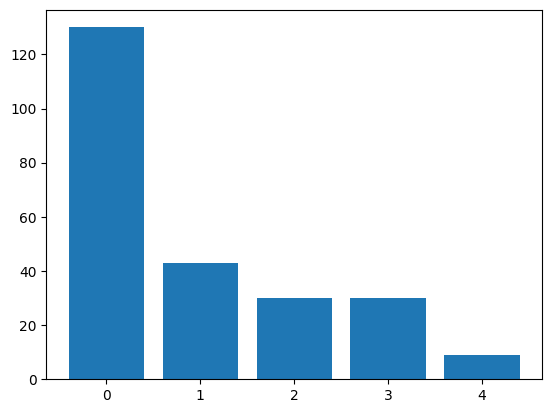

In [ ]:
# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

##### Over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
os=RandomOverSampler()
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0.0: 130, 1.0: 43, 3.0: 30, 2.0: 30, 4.0: 9})
The number of classes after fit Counter({0.0: 130, 3.0: 130, 1.0: 130, 2.0: 130, 4.0: 130})


Class=0, n=130 (20.000%)
Class=3, n=130 (20.000%)
Class=1, n=130 (20.000%)
Class=2, n=130 (20.000%)
Class=4, n=130 (20.000%)


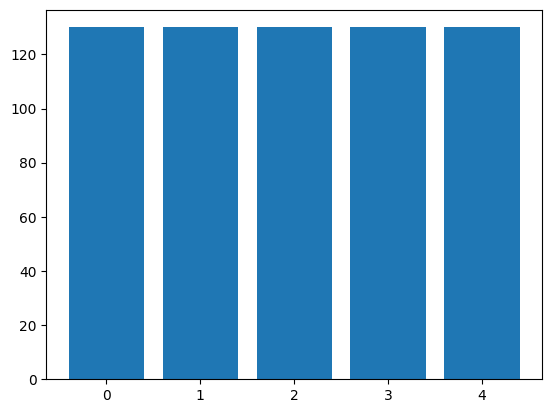

In [ ]:
# summarize distribution
counter = Counter(y_train_ns)
for k,v in counter.items():
	per = v / len(y_train_ns) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
X_train=X_train_ns
y_train=y_train_ns

In [ ]:
X_train.shape

(650, 13)

In [ ]:
#StandardScaler for normalization for some algortihms
sc = StandardScaler()

#min-max scaler for normalization for some algortihms
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
#code for svm

from sklearn.svm import SVC
model1 = SVC(probability=True,C=.01)

X_train_scaled = sc.fit_transform(X_train)
X_train_svc=X_train_scaled[:,0:13]
X_test_scaled = sc.transform(X_test)
X_test_svc=X_test_scaled[:,0:13]


model1.fit(X_train_svc,y_train)
rounded_predictions1 = model1.predict(X_test_svc)
predictions1 =model1.predict_proba(X_test_svc)
y_pred1 = rounded_predictions1

import sklearn.metrics as metrics
scores=metrics.accuracy_score(y_test,y_pred1)
print("SVM",scores)

print(metrics.confusion_matrix(y_test,y_pred1))
print(metrics.classification_report(y_test,y_pred1))




SVM 0.45901639344262296
[[24  7  4  0  0]
 [ 6  1  3  0  1]
 [ 1  0  2  0  3]
 [ 1  0  3  0  1]
 [ 0  0  3  0  1]]
              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72        35
         1.0       0.12      0.09      0.11        11
         2.0       0.13      0.33      0.19         6
         3.0       0.00      0.00      0.00         5
         4.0       0.17      0.25      0.20         4

    accuracy                           0.46        61
   macro avg       0.24      0.27      0.24        61
weighted avg       0.48      0.46      0.46        61



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:


# code for ANN

from keras.models import Sequential
from keras import regularizers
from keras.regularizers import l2
from keras.layers import Dense ,BatchNormalization
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import SGD
scaler = MinMaxScaler(feature_range=(0,1))
# Define a Deep Learning Model
model4 = Sequential()
model4.add(Dense(8, input_dim=13,use_bias=True,bias_initializer='zeros', activation='relu', kernel_regularizer=l2(0.01) ))
model4.add(Dense(5, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model4.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])



#Normalize train & test sample
scaled_X_train_ann=scaler.fit_transform(X_train)
scaled_X_test_ann=scaler.transform(X_test)
# Train the Model

history=model4.fit(scaled_X_train_ann, y_train,validation_split=0.1, batch_size=5,epochs=20,shuffle=True,verbose=2)


predictions4 = model4.predict(scaled_X_test_ann,batch_size=5,verbose=0)
#rounded_predictions4 = model4.predict_classes(scaled_X_test_ann,batch_size=5,verbose=0)
rounded_predictions4=np.argmax(predictions4,axis=1)
y_pred4 = rounded_predictions4


#print(predictions)
import sklearn.metrics as metrics
scores4=metrics.accuracy_score(y_test,y_pred4)
print("ANN",scores4)

print(metrics.confusion_matrix(y_test,y_pred4))
print(metrics.classification_report(y_test,y_pred4))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


117/117 - 1s - loss: 1.6968 - accuracy: 0.2821 - val_loss: 2.2353 - val_accuracy: 0.0000e+00 - 1s/epoch - 9ms/step
Epoch 2/20
117/117 - 0s - loss: 1.6399 - accuracy: 0.3573 - val_loss: 2.2569 - val_accuracy: 0.0000e+00 - 181ms/epoch - 2ms/step
Epoch 3/20
117/117 - 0s - loss: 1.6040 - accuracy: 0.3761 - val_loss: 2.2721 - val_accuracy: 0.0000e+00 - 180ms/epoch - 2ms/step
Epoch 4/20
117/117 - 0s - loss: 1.5739 - accuracy: 0.3453 - val_loss: 2.3227 - val_accuracy: 0.0000e+00 - 190ms/epoch - 2ms/step
Epoch 5/20
117/117 - 0s - loss: 1.5445 - accuracy: 0.3897 - val_loss: 2.2805 - val_accuracy: 0.0000e+00 - 183ms/epoch - 2ms/step
Epoch 6/20
117/117 - 0s - loss: 1.5112 - accuracy: 0.3709 - val_loss: 2.3458 - val_accuracy: 0.0000e+00 - 191ms/epoch - 2ms/step
Epoch 7/20
117/117 - 0s - loss: 1.4803 - accuracy: 0.4000 - val_loss: 2.3081 - val_accuracy: 0.0000e+00 - 183ms/epoch - 2ms/step
Epoch 8/20
117/117 - 0s - loss: 1.4544 - accuracy: 0.4051 - val_loss: 2.3289 - val_accuracy: 0.0000e+00 - 189ms

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

#weighted fusion
#same procedure for every model(1,2 and 3). for every model we need to take the prediction
# values and then the values will be merged according to the procedure given in below.

p=1
#q=1-p
for i in range (19):
    p=p-.05
    q=1-p

    mixed=predictions1*p+predictions4*q


    out = []
    for i in range(len(y_test)):
        out.append(i)

    k=-1
    for i in range(len(y_test)):
        k=k+1
        for j in range(5):
            max=numpy.max(mixed[i])

        for j in range(5):
            if (mixed[i][j]== max):
                out[k]=j


    import numpy as np
    out = np.asarray(out)
    score3=metrics.accuracy_score(out,y_test)
    print("  mixed  p  q","%.4f" %score3, "%.2f" %p,"%.2f" %q)


#after selecting the value of p and q which gives the highest accuracy.This value differs for different algorithms.
p=.55
q=1-p
mixed=predictions1*p+predictions4*q


out = []
for i in range(len(y_test)):
    out.append(i)

k=-1
#mixed
for i in range(len(y_test)):
    k=k+1
    for j in range(5):
        max=numpy.max(mixed[i])
    for j in range(5):
        if (mixed[i][j]== max):
            out[k]=j


import numpy as np
out = np.asarray(out)
score3=metrics.accuracy_score(out,y_test)
print("MIXED",score3)




print(metrics.confusion_matrix(y_test,out))
print(metrics.classification_report(y_test,out))

macro_roc_auc_ovo = roc_auc_score(y_test, mixed, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, mixed, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, mixed, multi_class="ovr",average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, mixed, multi_class="ovr",average="weighted")
#print all score for roc
print("macro_ovo,weight_ovo,macro_ovr,weight_ovr",
        macro_roc_auc_ovo, weighted_roc_auc_ovo,macro_roc_auc_ovr ,weighted_roc_auc_ovr)


  mixed  p  q 0.5246 0.95 0.05
  mixed  p  q 0.5738 0.90 0.10
  mixed  p  q 0.5738 0.85 0.15
  mixed  p  q 0.5738 0.80 0.20
  mixed  p  q 0.5738 0.75 0.25
  mixed  p  q 0.5738 0.70 0.30
  mixed  p  q 0.5738 0.65 0.35
  mixed  p  q 0.5738 0.60 0.40
  mixed  p  q 0.5738 0.55 0.45
  mixed  p  q 0.5738 0.50 0.50
  mixed  p  q 0.5738 0.45 0.55
  mixed  p  q 0.5738 0.40 0.60
  mixed  p  q 0.5738 0.35 0.65
  mixed  p  q 0.5738 0.30 0.70
  mixed  p  q 0.5738 0.25 0.75
  mixed  p  q 0.5738 0.20 0.80
  mixed  p  q 0.5738 0.15 0.85
  mixed  p  q 0.5738 0.10 0.90
  mixed  p  q 0.5738 0.05 0.95
MIXED 0.5737704918032787
[[26  7  1  1  0]
 [ 4  5  0  2  0]
 [ 1  2  0  3  0]
 [ 1  0  0  4  0]
 [ 0  1  0  3  0]]
              precision    recall  f1-score   support

         0.0       0.81      0.74      0.78        35
         1.0       0.33      0.45      0.38        11
         2.0       0.00      0.00      0.00         6
         3.0       0.31      0.80      0.44         5
         4.0       0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-79-e41b6f891d25>:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


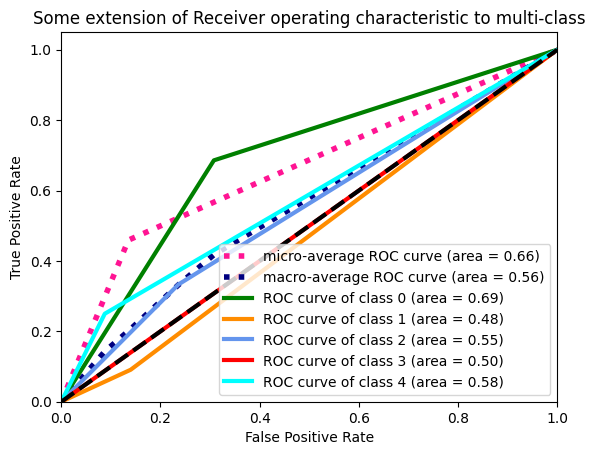

In [ ]:

#ROC curve for SVM


from sklearn.preprocessing import label_binarize
y_test_h = label_binarize(y_test, classes=[0, 1, 2, 3, 4])


y_score1 = label_binarize(y_pred1, classes=[0, 1, 2, 3, 4])
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
n_classes=5
lw=3
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_h[:, i], y_score1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_h.ravel(), y_score1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['green', 'darkorange', 'cornflowerblue','red','aqua'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()





<ipython-input-80-e21d7555a5c2>:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


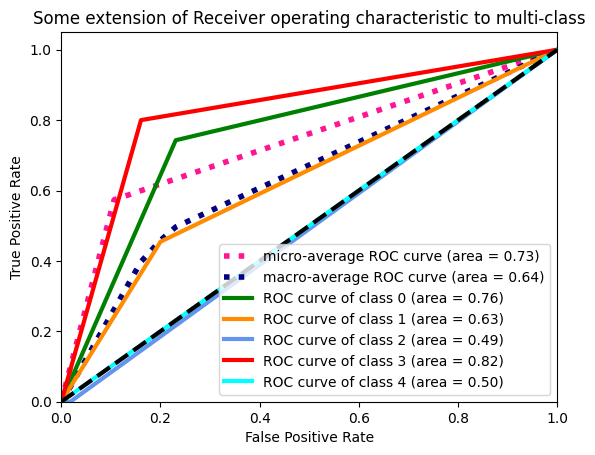

In [ ]:

#ROC curve for ANN



from sklearn.preprocessing import label_binarize
y_test_h = label_binarize(y_test, classes=[0, 1, 2, 3, 4])


y_score1 = label_binarize(y_pred4, classes=[0, 1, 2, 3, 4])
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
n_classes=5
lw=3
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_h[:, i], y_score1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_h.ravel(), y_score1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['green', 'darkorange', 'cornflowerblue','red','aqua'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()





<ipython-input-81-bc47aee733a7>:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


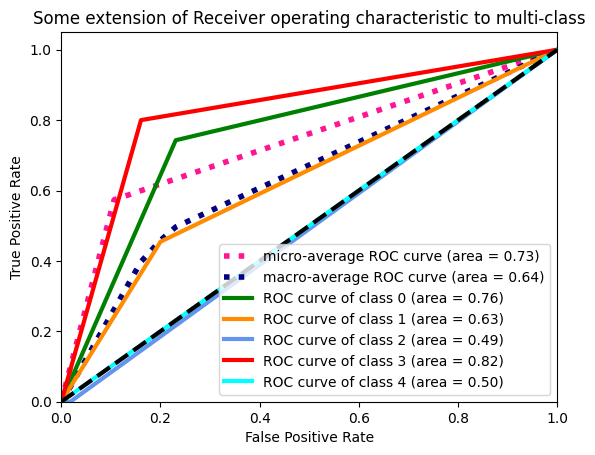

In [ ]:

#ROC curve for (ANN+SVM)


from sklearn.preprocessing import label_binarize
y_test_h = label_binarize(y_test, classes=[0, 1, 2, 3, 4])


y_score1 = label_binarize(out, classes=[0, 1, 2, 3, 4])
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
n_classes=5
lw=3
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_h[:, i], y_score1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_h.ravel(), y_score1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['green', 'darkorange', 'cornflowerblue','red','aqua'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()



